In [12]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def Direct(y, t, TF1, k1, k2, Kd1, total_time):
    if t > total_time / 3:
        TF1 = 0
    if t > total_time * 2/3:
        TF1 = 1
    d_dt = np.zeros(1)
    d_dt[0] = k1*(1 - 1/(1+ (TF1/Kd1))) - k2*y[0]
    return d_dt

In [47]:
def integrate_Direct(y0, time_steps, params):
    total_time = time_steps[-1]
    result = odeint(
        lambda y, t: Direct(y, t, params['TF1'], params['k1'], params['k2'], params['Kd1'], total_time),
        y0, time_steps
    )
    return result

In [103]:
params = {'TF1':1, 'k1':1, 'k2':.1, 'k3':1, 'k4':.1, 'k5':1, 'k6':.1, 'Kd1':1, 'Kd2':1, 'Kd11':1}
y0 = [0]
time_steps = np.linspace(0, 200, 200)

In [104]:
data = integrate_Direct(y0, time_steps, params)

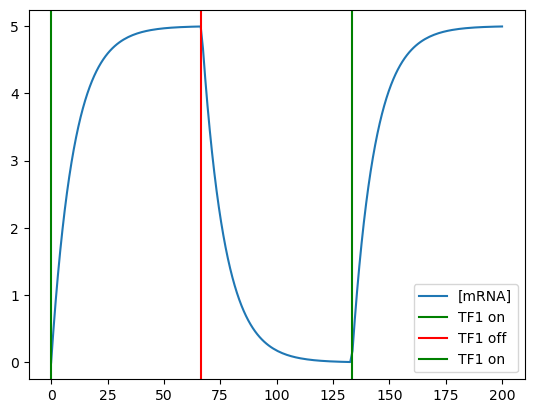

In [105]:
plt.plot(time_steps, data[:,0], label = '[mRNA]')
plt.axvline(x = 0, color = 'g', label = 'TF1 on')
plt.axvline(x = 200/3, color = 'r', label = 'TF1 off')
plt.axvline(x = 200 * 2/3, color = 'g', label = 'TF1 on')
# plt.plot(time_steps, data[: ,1], label = '[TF]')
plt.legend(loc = 'best')